In [6]:
import pandas as pd
data = pd.read_csv('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/data/Initial_luck/LL_05BART_LL.txt',
                   sep = '\t')
def get_balloon_data(data):
    return(data.groupby(['ID', 'balloon']).max())

tbl = get_balloon_data(data)

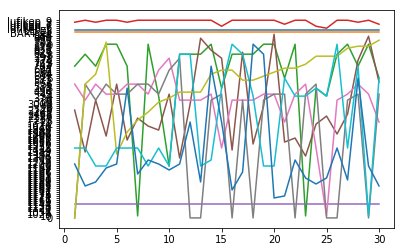

In [8]:
import matplotlib.pyplot as plt
for ID in data.ID.unique():
    plt.plot(data.loc[data.ID == ID].groupby(['balloon']).max())
plt.show()

In [14]:
data

,ID,scenario,balloon,nr_pumps,event,response,RT,balloon_earn,last_earn,total_earn,pop,delay_b
0,LL_05,BART_LL,1,0,default,2,2729,0,0,0,15,10
1,LL_05,BART_LL,1,1,lufikep_2,2,1379,1,0,0,15,1088
2,LL_05,BART_LL,1,2,lufikep_3,2,874,3,0,0,15,1132
3,LL_05,BART_LL,1,3,lufikep_4,2,953,6,0,0,15,1102
4,LL_05,BART_LL,1,4,lufikep_5,2,966,10,0,0,15,1200
5,LL_05,BART_LL,1,5,lufikep_6,2,954,15,0,0,15,1017
6,LL_05,BART_LL,1,6,lufikep_7,2,1031,21,0,0,15,1015
7,LL_05,BART_LL,1,7,lufikep_8,3,988,28,0,0,15,1035
8,LL_05,BART_LL,2,0,default,2,802,0,28,28,15,10
9,LL_05,BART_LL,2,1,lufikep_2,2,991,1,28,28,15,1058


In [44]:
stan_data = []
def format_data_for_stan(data):
    dat = dict(N = len(data),
               pumps = [d['pumps']+1 for d in data],
               popped = [int(d['popped']) for d in data],
               )
    return(dat)

def get_stan_data(tbl):
    stan_data = dict(pumps = [],
                     popped = [])
    for row in tbl.iterrows():
        if(row[1].response == 2): # KIDURRANT
            stan_data['pumps'].append(row[1].nr_pumps-1)
            stan_data['popped'].append(1)
        else:
            stan_data['pumps'].append(row[1].nr_pumps)
            stan_data['popped'].append(0)

    i_max = 100
    stan_data['i_max'] = i_max
    stan_data['rewards'] = [(n+1)*n/2 for n in range(i_max)]
    stan_data['N'] = len(stan_data['pumps'])
    stan_data['gamma_std'] = 2.0
    stan_data['beta_std'] = 20.0
    stan_data['a0_std'] = 400.0
    stan_data['m0_std'] = 400.0
    return(stan_data)
stan_data = get_stan_data(tbl)

In [45]:
from pystan import StanModel
import pickle
#sm = StanModel('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/model_3_softmax.stan')
#pickle.dump(sm, open('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/naive_model_3.pkl','wb'))
sm = pickle.load(open('/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/python/naive_model_3.pkl','rb'))

In [46]:
from wurlitzer import sys_pipes
chains = 4
with sys_pipes():
    fit = sm.sampling(data = stan_data,
                      iter = 3000,
                      chains = chains,
                      seed = 123)
    samples = fit.extract()


Gradient evaluation took 0.000137 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.37 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000146 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.46 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.00012 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.2 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:    1 / 3000 [  0%]  (Warmup)

Gradient evaluation took 0.0001 seconds
1000 transitions using 10 leapfrog steps per transition would take 1 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  600 / 3000 [ 20%]  

In [63]:
data_dir = '/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/data/Initial_luck/'
sequential_data = ['LS_03BART_LS.txt',
                   'LL_05Bart_LL.txt',
                   'US_04_BART_US.txt',
                   'UL_03_BART_UL.txt',
                  ] 
results = []
for data_name in sequential_data:
    data = pd.read_csv(data_dir+data_name,
                   sep = '\t')
    tbl = get_balloon_data(data)
    stan_data = get_stan_data(tbl)
    chains = 4
    with sys_pipes():
        fit = sm.sampling(data = stan_data,
                          iter = 3000,
                          chains = chains,
                          seed = 123)
        results.append(fit.extract())


Gradient evaluation took 0.000139 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.39 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000111 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)

Gradient evaluation took 0.000116 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.16 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:    1 / 3000 [  0%]  (Warmup)

Gradient evaluation took 0.000105 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.05 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  600 / 3000 [

FileNotFoundError: File b'/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/data/Initial_luck/US_04_BART_US.txt' does not exist

Data file:  LS_03BART_LS.txt


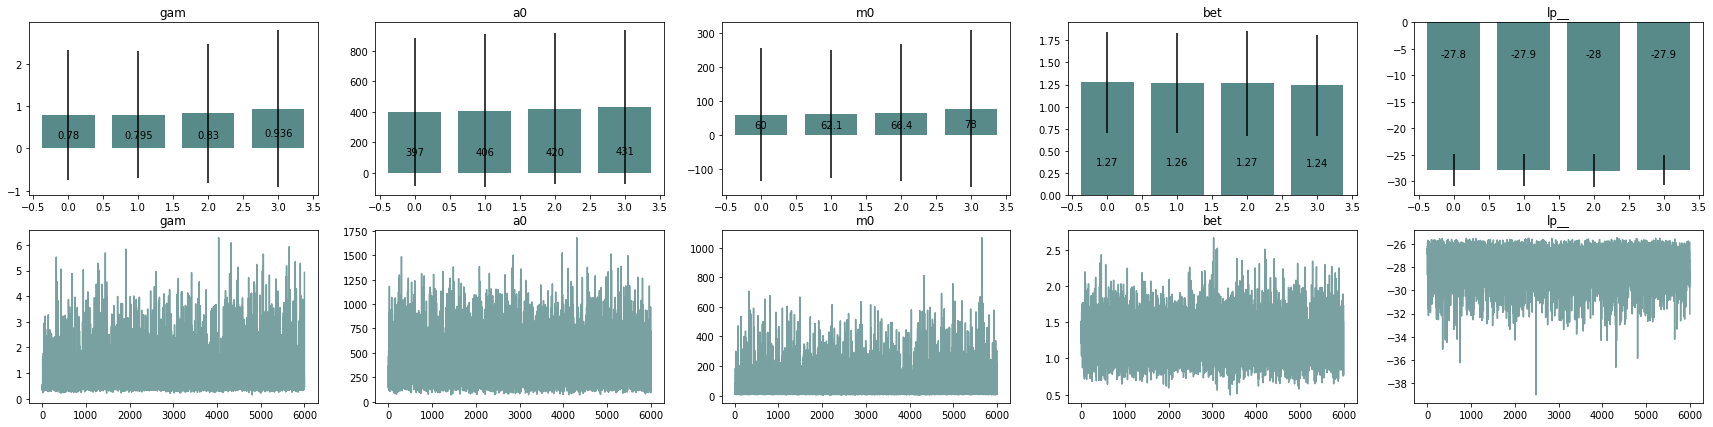

Data file:  LL_05Bart_LL.txt


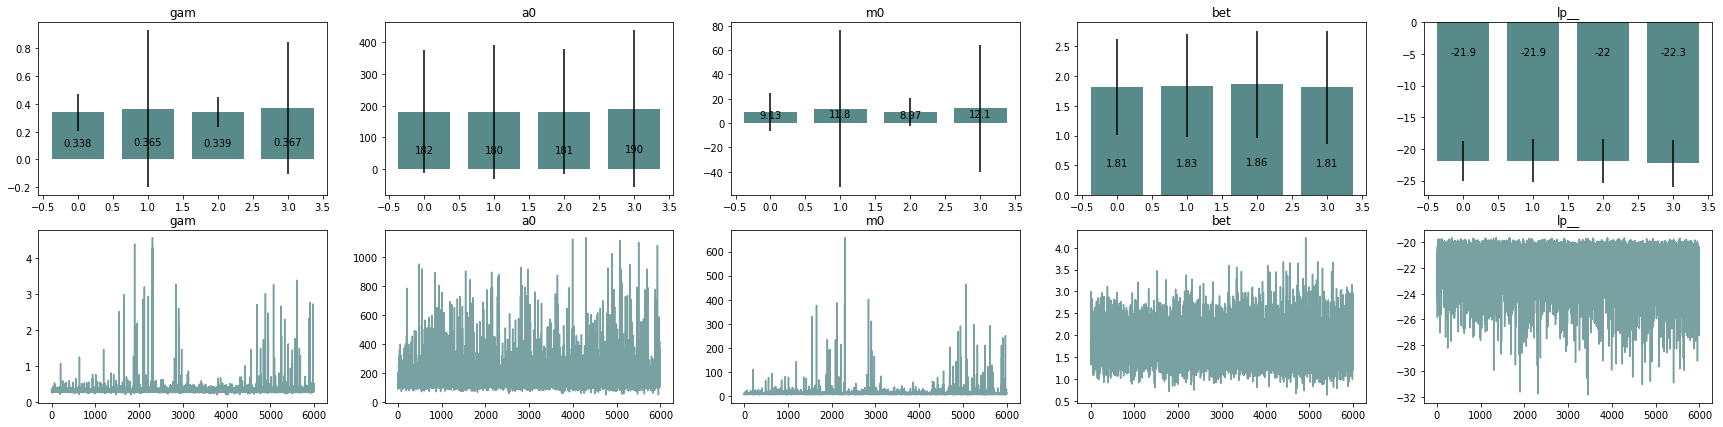

In [64]:
for i, samples in enumerate(results):
    print('Data file: ', sequential_data[i])
    s_p.sample_plots(samples, chains)

In [59]:
data_dir = '/Users/balazstorok/SCIENCE/Projects/BMLLab/bart/data/Sequential/'
sequential_data = ['D_103BART_det_1.txt',
                   'D_103BART_det_2.txt',
                   'D_103BART_rnd.txt',
                   'H_117BART_hib_1.txt',
                   'H_117BART_hib_2.txt',
                   'H_117BART_rnd.txt',]
results = []
for data_name in sequential_data:
    data = pd.read_csv(data_dir+data_name,
                   sep = '\t')
    tbl = get_balloon_data(data)
    stan_data = get_stan_data(tbl)
    chains = 4
    with sys_pipes():
        fit = sm.sampling(data = stan_data,
                          iter = 3000,
                          chains = chains,
                          seed = 123)
        results.append(fit.extract())



Gradient evaluation took 9.6e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.96 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000145 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.45 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:    1 / 3000 [  0%]  (Warmup)

Gradient evaluation took 0.000106 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.06 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)
Gradient evaluation took 0.000107 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.07 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  600 / 3000 [ 

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: bernoulli_logit_lpmf: Logit transformed probability parameter is nan, but must not be nan!  (in 'unknown file name' at line 43)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: bernoulli_logit_lpmf: Logit transformed probability parameter is nan, but must not be nan!  (in 'unknown file name' at line 43)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Me

Data file:  D_103BART_det_1.txt


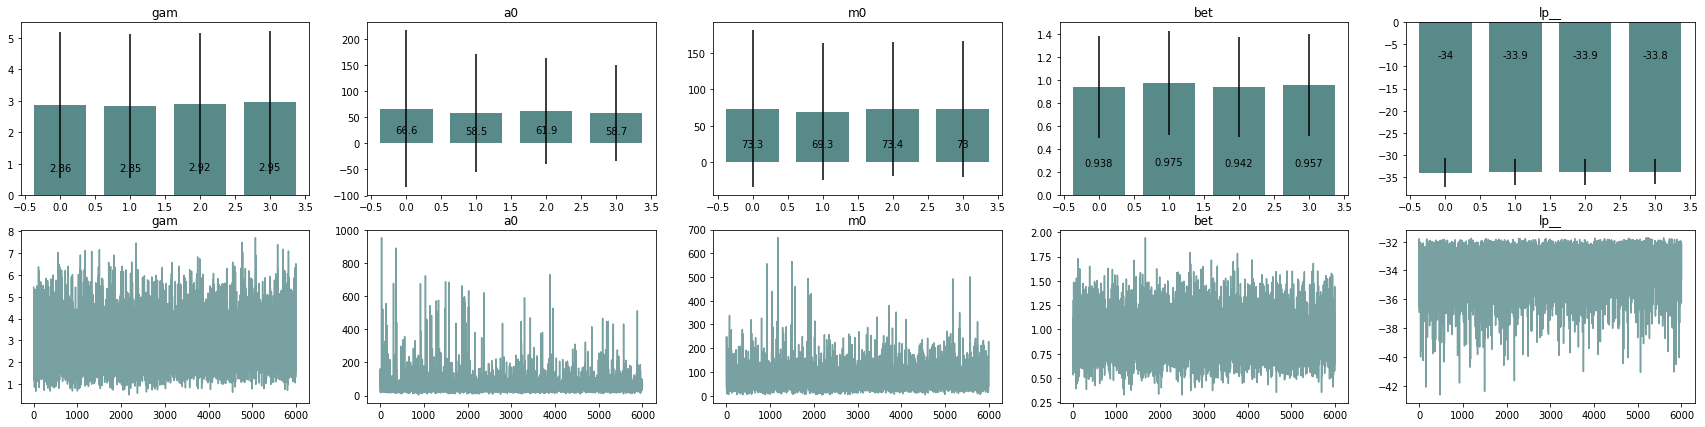

Data file:  D_103BART_det_2.txt


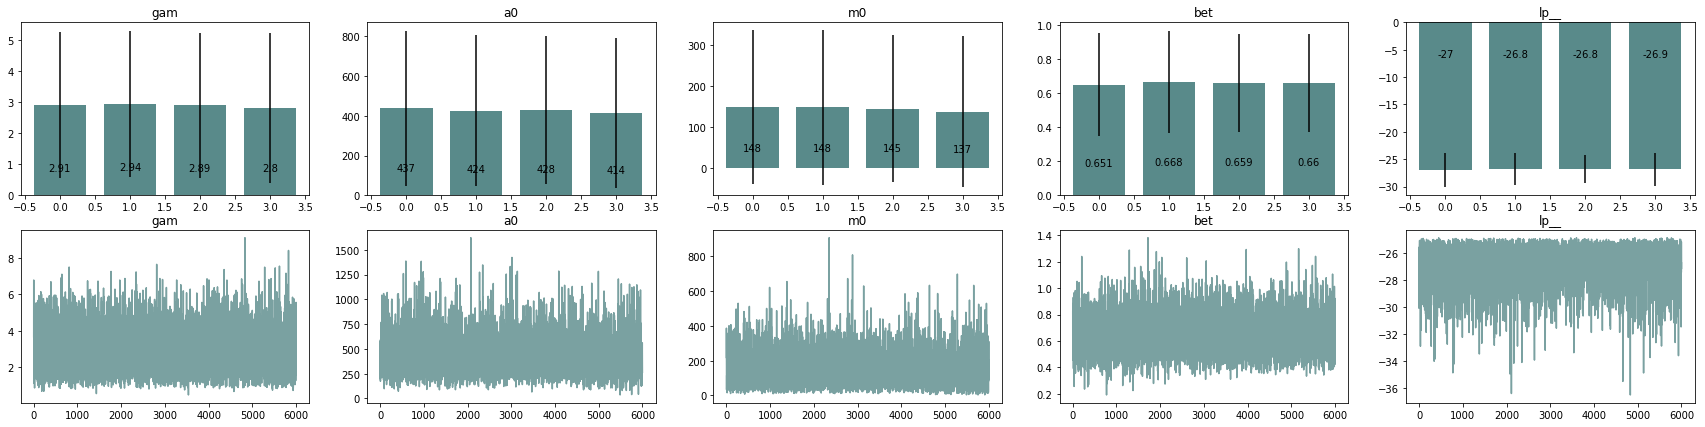

Data file:  D_103BART_rnd.txt


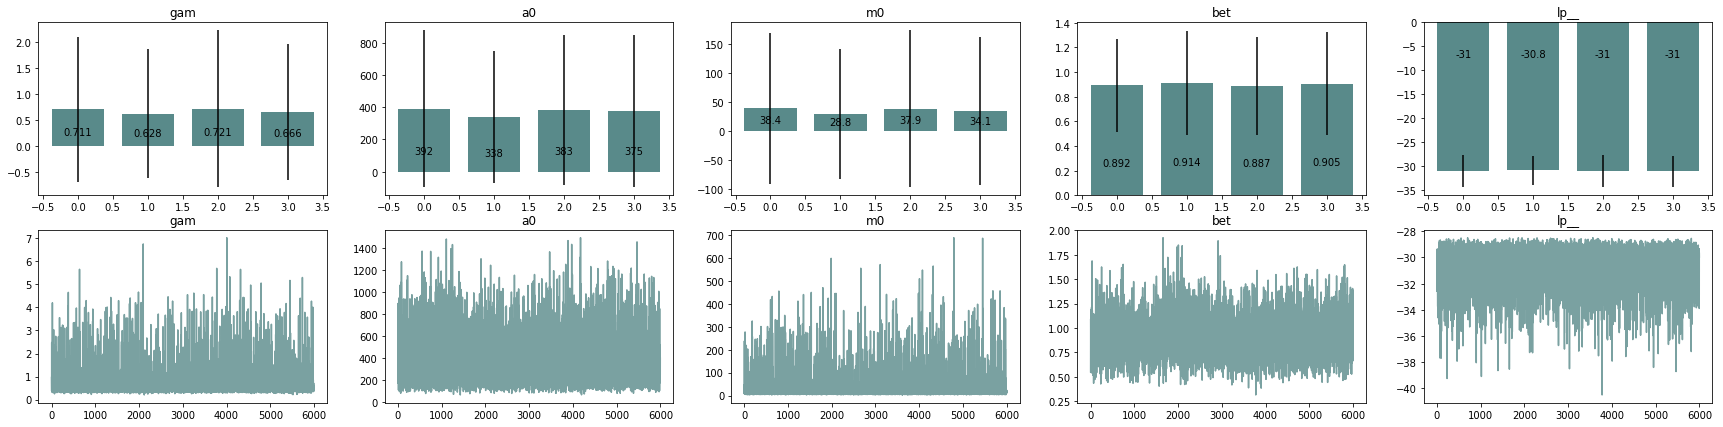

Data file:  H_117BART_hib_1.txt


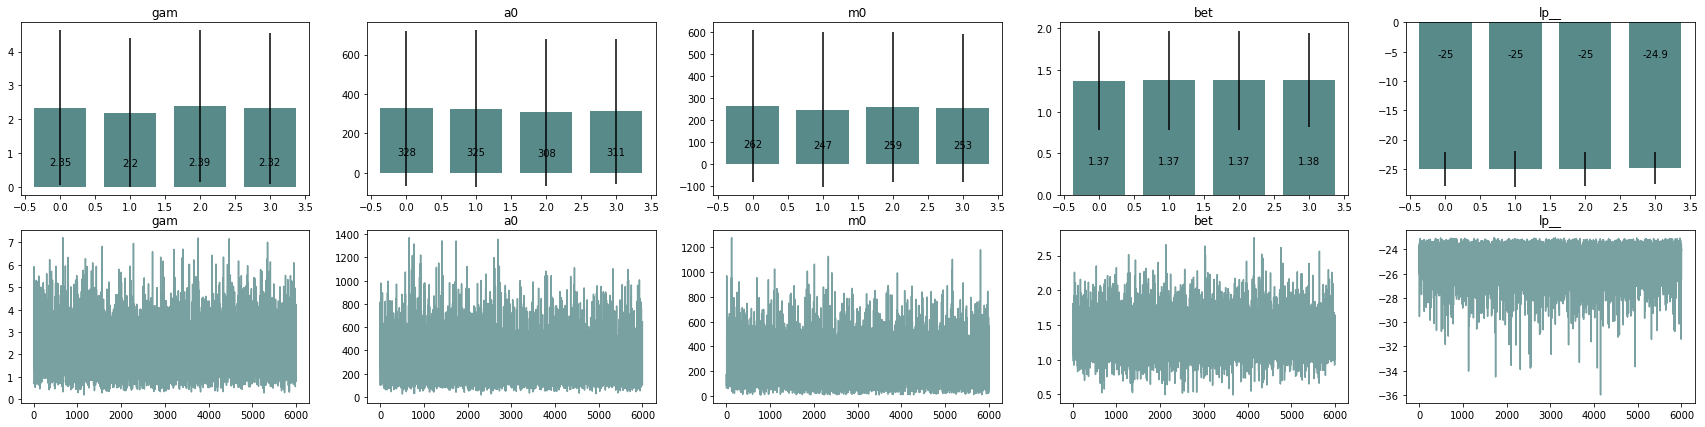

Data file:  H_117BART_hib_2.txt


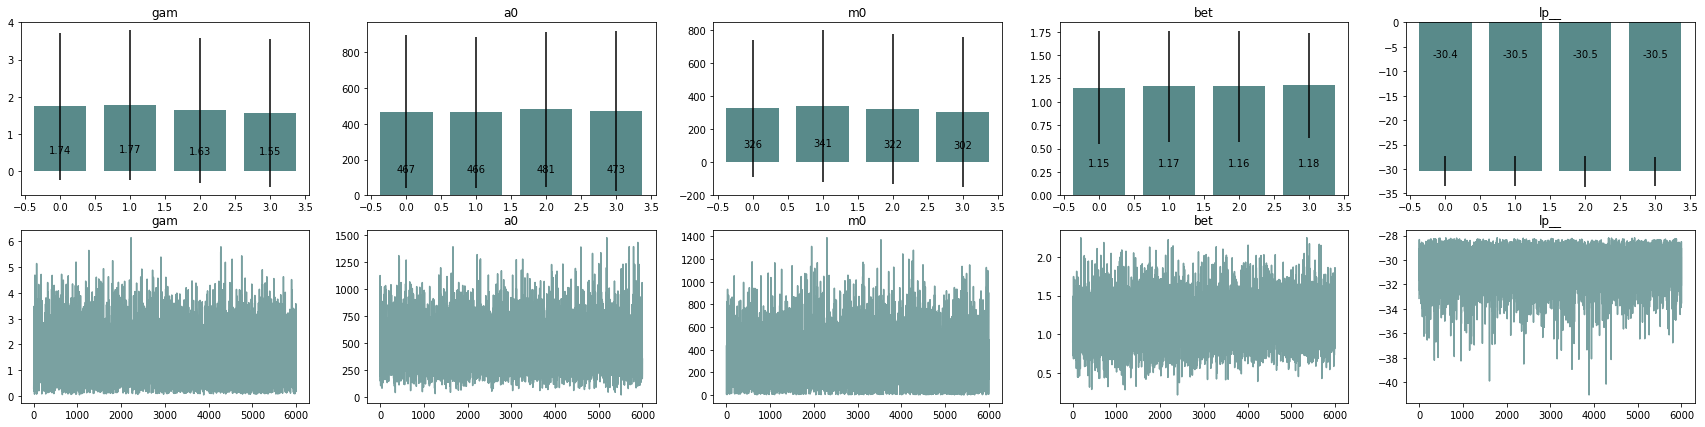

Data file:  H_117BART_rnd.txt


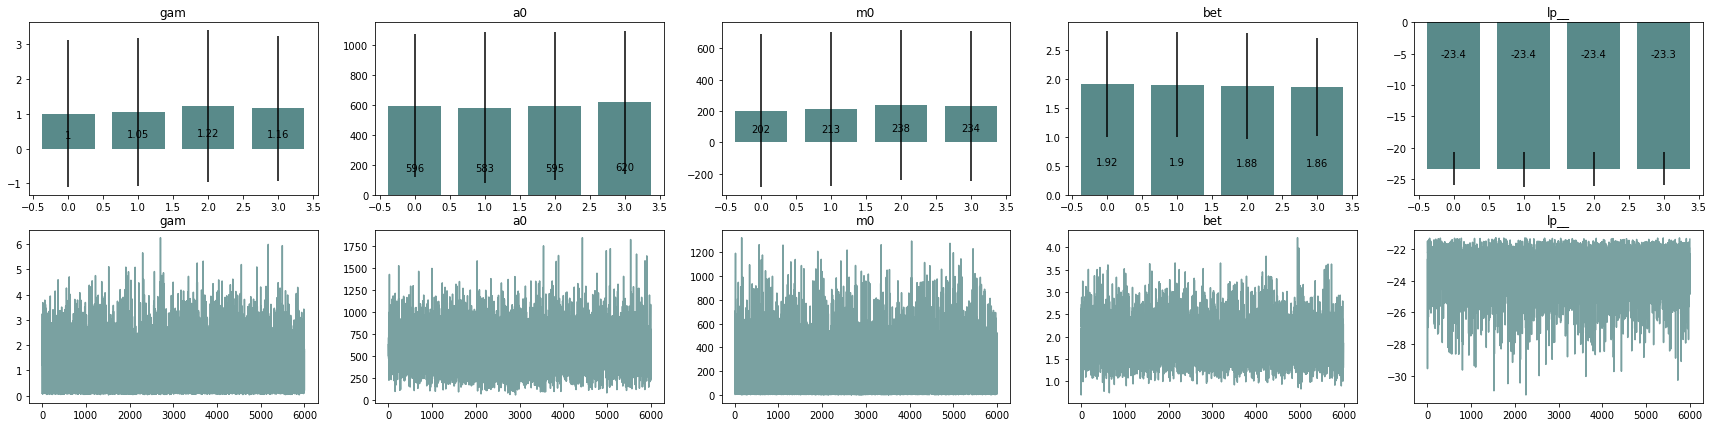

In [60]:
for i, samples in enumerate(results):
    print('Data file: ', sequential_data[i])
    s_p.sample_plots(samples, chains)